In [38]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

X, y = load_breast_cancer(return_X_y=True)
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
X.shape

(569, 30)

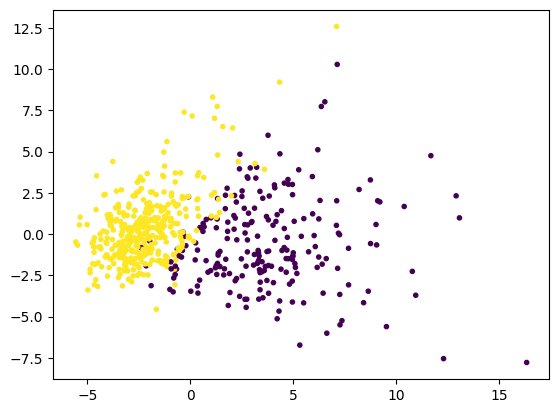

In [39]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, marker='.')

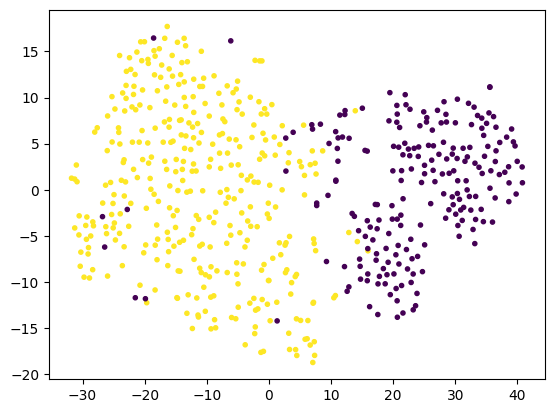

In [47]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', perplexity=30)
X_tsne= tsne.fit_transform(X_norm)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, marker='.')

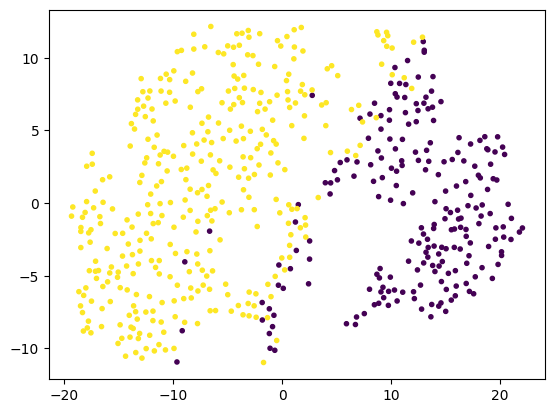

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
tsne = TSNE(n_components=2, perplexity=55)
X_tsne= tsne.fit_transform(X_pca)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, marker='.')

In [55]:
from sklearn.datasets import fetch_olivetti_faces
X, y = fetch_olivetti_faces(return_X_y=True)
X.shape, y.shape

((400, 4096), (400,))

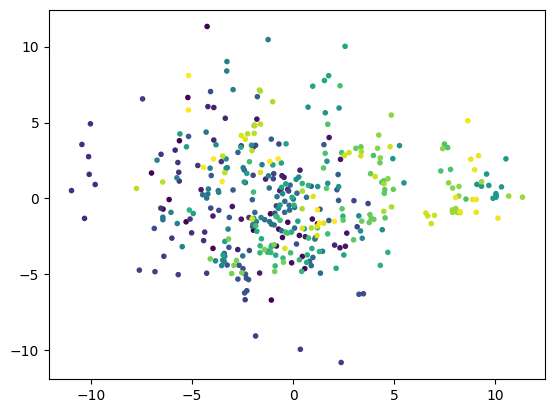

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, marker='.')

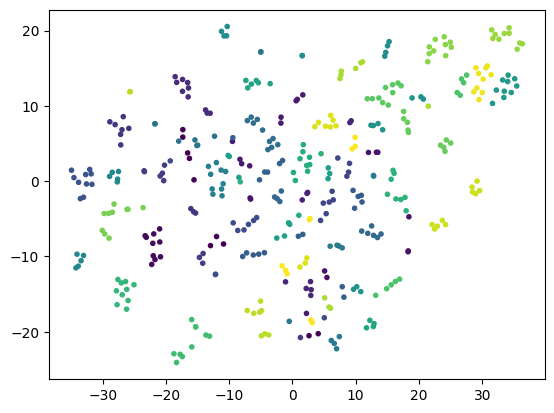

In [36]:
tsne = TSNE(n_components=2, n_iter=1000)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, marker='.')

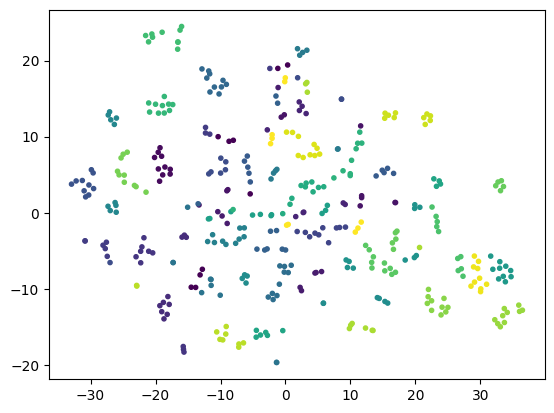

In [23]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_pca)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, marker='.')

In [24]:
import numpy as np
perplexities = np.arange(5, 80, 10)
divergences = []
for p in perplexities:
    tsne = TSNE(n_components=2, perplexity=p)
    reduced = tsne.fit_transform(X_pca)
    divergences.append(tsne.kl_divergence_)
print(divergences)

[0.40043678879737854, 0.5396196246147156, 0.5690634250640869, 0.5467866063117981, 0.4812931418418884, 0.45074406266212463, 0.47868287563323975, 0.45337584614753723]


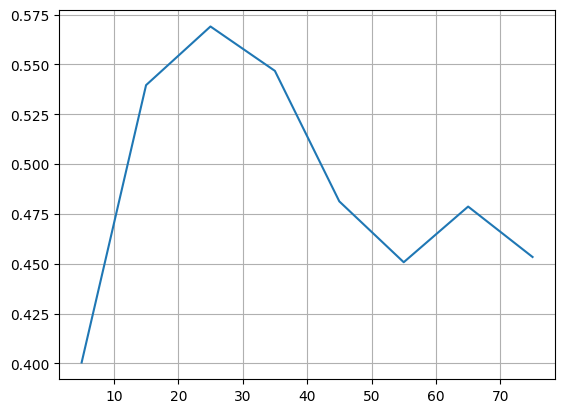

In [25]:
plt.plot(perplexities, divergences)
plt.grid()

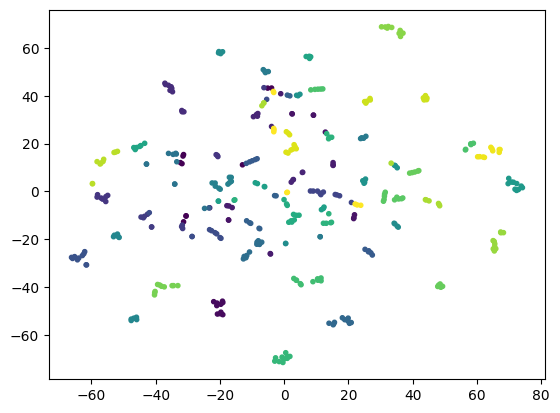

In [26]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X_pca)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, marker='.')

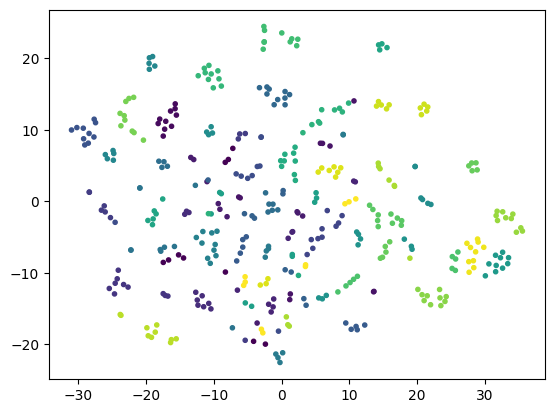

In [27]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)
tsne = TSNE(n_components=2, n_iter=5000)
X_tsne = tsne.fit_transform(X_pca)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, marker='.')

In [51]:
import numpy as np
learning_rates = np.arange(10, 1000, 100)
divergences = []
for lr in learning_rates:
    tsne = TSNE(n_components=2, learning_rate=lr)
    reduced = tsne.fit_transform(X)
    divergences.append(tsne.kl_divergence_)
print(divergences)

[0.5557172894477844, 0.6020733118057251, 0.5857953429222107, 0.6288262009620667, 0.5634709596633911, 0.643515944480896, 0.6142054796218872, 0.6895589828491211, 0.5764033198356628, 0.600155234336853]


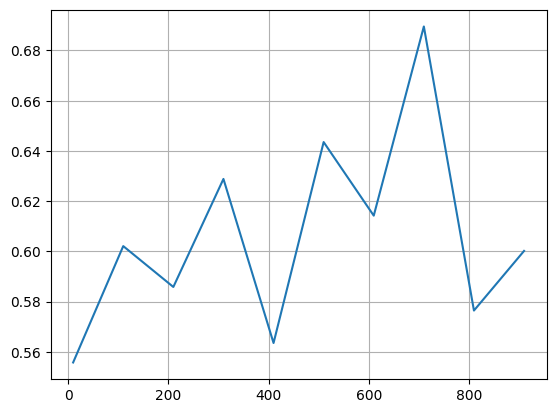

In [52]:
plt.plot(learning_rates, divergences)
plt.grid()

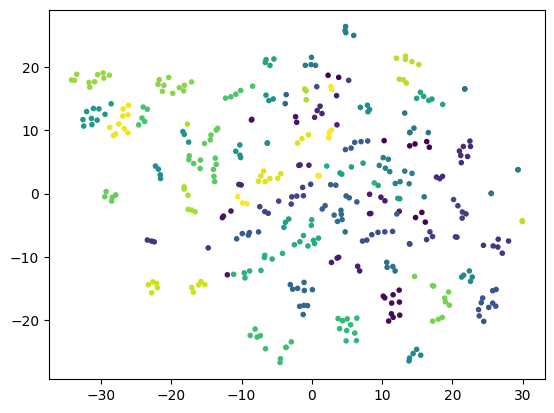

In [58]:
tsne = TSNE(n_components=2, n_iter=1000, learning_rate=700)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, marker='.')